In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster
import seaborn as sns
from sklearn import metrics

In [20]:
# функции для вычисления метрик качества кластерищации
#Calinski-Harabasz index 
def Cal_Har_index(data,labels):
    res = metrics.calinski_harabaz_score(data, labels)
    print("Calinski-Harabasz index:{:04}  ".format(res))

#Davies–Bouldin index 
def Dav_Boul_index(data,labels):
    res = metrics.davies_bouldin_score(data, labels)
    print("Davies–Bouldin index:{:04}  ".format(res))    

#Silhouette Coefficient 
def Silhouette_coeff(data,labels):
    res = metrics.silhouette_score(data, labels, metric='euclidean')
    print("Silhouette Coefficient:{:04}  ".format(res))   

def mean_of_subset(data):
    length, parameters = data.shape
    centroid = []
    for i in range(parameters):
        centroid.append(np.sum(data[:, i])/length)
    return np.array(centroid)
#Cluster_cohesion
def Cluster_cohesion(data,labels):
    #этой метрики нет в арсенале sklearn, поэтому реализуем её вручную
    num_clusters = np.unique(labels)
    
    wss = 0
    for k in range(data.shape[0]):
        cluster_subset = []
        for i in range(data.shape[0]):
            if labels[i] == k:
                cluster_subset.append(data[i])
                
        cluster = np.array(cluster_subset)
        if cluster.shape[0] != 0:
            mean_elem = mean_of_subset(cluster)  
        else:
            mean_elem = np.zeros(shape=(data.shape[1]))
        
        for i in range(cluster.shape[0]):
            temp = 0
            for j in range(cluster.shape[1]):
                temp += (cluster[i][j]-mean_elem[j])**2
            wss += temp
    #return wss
    print("Cluster_cohesion:{:04}\n  ".format(wss), end='') 

def print_metrics(data,labels):
  Cal_Har_index(data,labels)
  Dav_Boul_index(data,labels)
  Silhouette_coeff(data,labels)
  Cluster_cohesion(data,labels)

In [32]:
df1 = pd.read_table('/content/moons.txt',header=None, names=['X','Y','Class'],delimiter=' ')
df1.head()

,X,Y,Class
0,-0.886909,-0.460419,0
1,0.060729,-0.288140,1
2,0.273133,0.199329,1
3,1.553436,-0.413631,1
4,-0.129158,0.426655,0


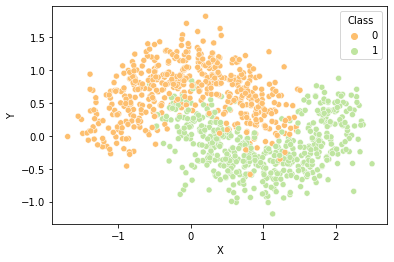

In [34]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df1, palette=sns.color_palette("Spectral", n_colors=2))

In [33]:
df1['Class'].unique()

array([0, 1])

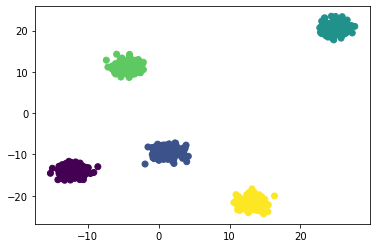

In [41]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 1000,n_features=2, centers=5,cluster_std = 1,center_box=(-28.0,28.0),shuffle=False)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()